In [43]:
pip install pyyaml h5py

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_color_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,250,121), thickness=1, circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [6]:
cap = cv.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_color_landmarks(image, results)
        cv.imshow('OCV Feed', frame)
        cv.imshow('OCV drawn', image)
    
        if cv.waitKey(10) & 0xFF == ord ('q'):
            break
    cap.release()
    cv.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
results.face_landmarks

landmark {
  x: 0.45815122
  y: 0.673033
  z: -0.020616636
}
landmark {
  x: 0.45624167
  y: 0.6172285
  z: -0.07117201
}
landmark {
  x: 0.45761216
  y: 0.62890244
  z: -0.03002274
}
landmark {
  x: 0.44566187
  y: 0.53470343
  z: -0.06474043
}
landmark {
  x: 0.4562688
  y: 0.5956531
  z: -0.07922789
}
landmark {
  x: 0.45702043
  y: 0.5623496
  z: -0.078498036
}
landmark {
  x: 0.45967925
  y: 0.4763252
  z: -0.05508853
}
landmark {
  x: 0.36192775
  y: 0.44781852
  z: -0.00019547758
}
landmark {
  x: 0.46079856
  y: 0.41841564
  z: -0.055420578
}
landmark {
  x: 0.46120462
  y: 0.38959673
  z: -0.06438872
}
landmark {
  x: 0.46293068
  y: 0.2807982
  z: -0.07186172
}
landmark {
  x: 0.45832512
  y: 0.6823306
  z: -0.016819824
}
landmark {
  x: 0.45862696
  y: 0.68773973
  z: -0.010841211
}
landmark {
  x: 0.45900953
  y: 0.6881846
  z: -0.0037843033
}
landmark {
  x: 0.45923617
  y: 0.69153637
  z: -0.0011887363
}
landmark {
  x: 0.45921895
  y: 0.70054734
  z: -0.0020318523
}
land

In [8]:
frame

array([[[ 72,  98, 120],
        [ 72,  98, 120],
        [ 71,  97, 119],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 72, 100, 121],
        [ 71,  99, 120],
        [ 70,  98, 119],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 70, 101, 120],
        [ 70, 101, 120],
        [ 70, 100, 119],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 32,  32,  32],
        [ 32,  32,  32],
        [ 33,  34,  32],
        ...,
        [119,  92,  59],
        [121,  92,  61],
        [123,  92,  63]],

       [[ 32,  32,  32],
        [ 32,  32,  32],
        [ 33,  34,  32],
        ...,
        [130, 102,  64],
        [128,  99,  64],
        [125,  97,  64]],

       [[ 31,  31,  31],
        [ 32,  32,  32],
        [ 33,  34,  32],
        ...,
        [133, 105,  64],
        [131, 103,  65],
        [129, 101,  66]]

In [9]:
draw_landmarks(frame, results)

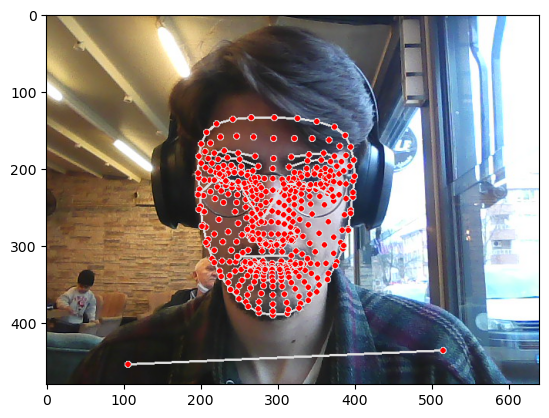

In [10]:
plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))

In [11]:
results.pose_landmarks.landmark[0].visibility

0.9995660185813904

In [12]:
pose = [] 
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.43743795,  0.56118494, -1.04905689, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
np.save('0', result_test)


In [18]:
np.load('0.npy')


array([ 0.43743795,  0.56118494, -1.04905689, ...,  0.        ,
        0.        ,  0.        ])

# data collection

In [19]:
DATA_PATH = os.path.join('MP_Data')

actions = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'H', 'I'])

no_sequence = 30

sequence_length = 30

In [20]:
for action in actions:
    for sequence in range(no_sequence):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
cap = cv.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequence):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                draw_color_landmarks(image, results)

                if frame_num == 0:
                    cv.putText(image, 'STARTING COLLECTİON', (120,200),
                              cv.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv.LINE_AA)
                    cv.putText(image, 'Collecting frames for {} Video number {}'.format(action, sequence), (15,12),
                               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv.LINE_AA)
                    cv.waitKey(2000)
                else:
                    cv.putText(image, 'Collecting frames for {} Video number {}'.format(action, sequence), (15,12),
                               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv.LINE_AA)
        
                cv.imshow('OCV Feed', frame)
                cv.imshow('OCV drawn', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
    
                if cv.waitKey(10) & 0xFF == ord ('q'):
                    break
    cap.release()
    cv.destroyAllWindows()

In [21]:
cap.release()
cv.destroyAllWindows()

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'H': 6, 'I': 7}

In [25]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequence):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(240, 30, 1662)

In [27]:
np.array(labels).shape

(240,)

In [28]:
x = np.array(sequences)

In [29]:
x.shape

(240, 30, 1662)

In [30]:
y = to_categorical(labels).astype(int)

In [31]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [33]:
y_test.shape

(12, 8)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [35]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [36]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [37]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [38]:
model.fit(x_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
8/8 [==============================] - 6s 199ms/step - loss: 12.5251 - categorical_accuracy: 0.1491
Epoch 2/100
8/8 [==============================] - 1s 121ms/step - loss: 8.1254 - categorical_accuracy: 0.1623
Epoch 3/100
8/8 [==============================] - 1s 181ms/step - loss: 7.5301 - categorical_accuracy: 0.0877
Epoch 4/100
8/8 [==============================] - 1s 152ms/step - loss: 6.2312 - categorical_accuracy: 0.1272
Epoch 5/100
8/8 [==============================] - 1s 120ms/step - loss: 3.3037 - categorical_accuracy: 0.1096
Epoch 6/100
8/8 [==============================] - 1s 123ms/step - loss: 2.7089 - categorical_accuracy: 0.1140
Epoch 7/100
8/8 [==============================] - 1s 164ms/step - loss: 2.6546 - categorical_accuracy: 0.1184
Epoch 8/100
8/8 [==============================] - 2s 230ms/step - loss: 2.4120 - categorical_accuracy: 0.1360
Epoch 9/100
8/8 [==============================] - 1s 129ms/step - loss: 2.2207 - categorical_accuracy: 0.1053


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
Total params: 596,840
Trainable params: 596,840
Non-trai

In [40]:
model.save('action.h5')


In [41]:
from scipy import stats

In [44]:
colors = [(245,117,16), (117,245,16), (16,117,245), (245,117,16), (117,245,16), (16,117,245), (245,117,16), (117,245,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num][0], -1)
        cv.putText(output_frame, actions[num], (0, 85+num*40), cv.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv.LINE_AA)
        
    return output_frame

In [45]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

IndexError: list index out of range

<Figure size 1800x1800 with 0 Axes>

In [46]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_color_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv.putText(image, ' '.join(sentence), (3,30), 
                       cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
        
        # Show to screen
        cv.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti